## Chi-Square: Goal and Usage

The **chi-square ($\chi^2$) test** is a statistical method used to compare **observed frequencies** with **expected frequencies** under a specific hypothesis. In feature selection and statistical analysis, it is primarily used to assess whether variables are **independent** or whether observed data significantly deviates from what would be expected by chance.

In general, chi-square tests are applied to **categorical or count-based data** and are widely used due to their simplicity, interpretability, and computational efficiency.

---

## Chi-Square for Goodness of Fit

The **chi-square goodness-of-fit test** evaluates whether the observed distribution of a **single categorical variable** matches a known or hypothesized distribution.

In feature selection, it tests:

_Is feature X independent of the class label $Y$?_

- Null hypothesis ($H_0$​): Feature and target are independent

- Alternative hypothesis ($H_1$​): Feature and target are dependent

If a feature is strongly associated with the target, the chi-square statistic is large, and the feature is considered **informative**.

## Chi-Square Test of Independence

The **chi-square test of independence** determines whether **two categorical variables** are statistically independent.

**Statistic:**

$$
\chi^2 = \sum \frac{(O - E)^2}{E}
$$

Where:

- $O$ = observed frequency
- $E$ = expected frequency


---

## Numerical Example of the Chi-Square Statistic

Suppose we want to test whether a feature (e.g., **Gender**) is independent of a class label (e.g., **Purchase: Yes/No**). First, create contigency tables for observed and expencted frequencies. A **contingency table** (or cross-tabulation) is a **matrix used to display the frequency distribution of two categorical variables**.  

### Observed Frequencies (O)

| Gender | Purchase = Yes | Purchase = No | Row Total |
|-------|----------------|---------------|-----------|
| Male  | 30             | 20            | 50        |
| Female| 10             | 40            | 50        |
| **Column Total** | **40** | **60** | **100** |

---

### Expected Frequencies (E)

Expected frequencies are computed assuming **independence**:

$$
E_{ij} = \frac{(\text{Row Total}_i)(\text{Column Total}_j)}{\text{Grand Total}}
$$

| Gender | Purchase = Yes  | Purchase = No   |
| ------ | --------------- | --------------- |
| Male   | 50\*40/100 = 20 | 50\*60/100 = 30 |
| Female | 50\*40/100 = 20 | 50\*60/100 = 30 |

---

### Compute the Chi-Square Statistic

$$
\chi^2 =
\frac{(30 - 20)^2}{20}

- \frac{(20 - 30)^2}{30}
- \frac{(10 - 20)^2}{20}
- \frac{(40 - 30)^2}{30}
$$

$$
\chi^2 =
\frac{100}{20}

- \frac{100}{30}
- \frac{100}{20}
- \frac{100}{30}
$$

$$
\chi^2 = 5 + 3.33 + 5 + 3.33 = 16.66
$$

---

$$
\text{df} = (\text{number of rows} - 1) \times (\text{number of columns} - 1)
$$

- Number of rows = 2 (Male, Female)
- Number of columns = 2 (Yes, No)

$$
\text{df} = (2-1) \times (2-1) = 1
$$

$$
16.66 > \chi^2_{critical}(\text{df}=1, \alpha=0.05) \approx 3.841
$$

---

### Interpretation

- A **large chi-square value** (e.g., 16.66) indicates a **strong association** between the feature and the target.
- If this value exceeds the critical value for the chosen significance level, we reject the null hypothesis of independence.

In feature selection, this means the feature is **informative** and should be retained.


### Discrete vs Categorical Variables

| Term                     | Definition                                                                            | Example                                             | Notes                                                 |
| ------------------------ | ------------------------------------------------------------------------------------- | --------------------------------------------------- | ----------------------------------------------------- |
| **Categorical variable** | Values represent categories or labels, usually nominal or ordinal, no numeric meaning | Gender = {Male, Female}, Color = {Red, Blue, Green} | Always treated as labels; encoding may map to numbers |
| **Discrete variable**    | Values are numerical but countable, usually integers                                  | Number of children = {0,1,2,3}, Dice roll = {1–6}   | Can be finite or countable, may have numeric meaning  |

**Key difference:**

- **Categorical = qualitative**
- **Discrete = quantitative but countable**

> Every categorical variable can be encoded as numbers, but not every discrete variable is categorical.


### Steps for Feature Selection Using Chi-Square

1. Build a contingency table for each feature
2. Compute the chi-square statistic for each feature
3. Calculate the p-value for each feature
4. Rank features based on chi-square statistic or p-value
5. Select the top features based on higher cho-square/lower p-value


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [2]:
df = load_digits()
X = pd.DataFrame(data=df.data, columns=df.feature_names)
y = pd.DataFrame(data=df.target)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [4]:
X.nunique().sort_values(ascending=True).head(15)

pixel_0_0     1
pixel_4_7     1
pixel_4_0     1
pixel_7_0     2
pixel_3_0     2
pixel_3_7     2
pixel_2_0     3
pixel_1_0     3
pixel_6_0     4
pixel_5_0     5
pixel_5_7     7
pixel_2_7     8
pixel_0_1     9
pixel_7_1    10
pixel_6_7    12
dtype: int64

In [5]:
cat_features = [col for col in X.columns if X[col].nunique() < 10]

In [6]:
contingency_table = pd.crosstab(
    y_train.to_numpy().ravel(),       # flatten to 1D
    X_train[cat_features[1]].to_numpy().ravel()
)

print(contingency_table)

col_0  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0
row_0                                             
0      124    0    1    0    0    0    0    0    0
1      131    1    0    0    0    0    0    0    0
2       74   19   16   12    6    3    0    0    0
3       74   30   17    1    6    0    1    0    0
4      121    0    0    0    0    0    0    0    0
5       64   21   11    9    5    2    1    2    1
6      128    0    0    0    0    0    0    0    0
7      116    3    2    2    1    0    0    0    0
8      120    6    3    2    0    0    0    0    0
9      108   11    2    0    0    0    0    0    0


In [7]:
chi2_info_dict = {
    'Feature': [],
    'Chi2': [],
    'P-value': []
}

for feature in cat_features:
    contingency_table = pd.crosstab(
        y_train.to_numpy().ravel(),
        X_train[feature].to_numpy().ravel()
    )
    
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_info_dict['Feature'].append(feature)
    chi2_info_dict['Chi2'].append(chi2)
    chi2_info_dict['P-value'].append(p)
    print(f"Feature: {feature}")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-value: {p}\n")

Feature: pixel_0_0
Chi-Square Statistic: 0.0
P-value: 1.0

Feature: pixel_0_1
Chi-Square Statistic: 404.2264234441123
P-value: 9.704586848922854e-48

Feature: pixel_1_0
Chi-Square Statistic: 21.271848087968124
P-value: 0.26592050165044306

Feature: pixel_2_0
Chi-Square Statistic: 15.210321587873564
P-value: 0.6474785720965255

Feature: pixel_2_7
Chi-Square Statistic: 90.14814997473587
P-value: 0.0014776126038111809

Feature: pixel_3_0
Chi-Square Statistic: 7.968256725165453
P-value: 0.537348328081787

Feature: pixel_3_7
Chi-Square Statistic: 28.23267033097393
P-value: 0.0008721024032344658

Feature: pixel_4_0
Chi-Square Statistic: 0.0
P-value: 1.0

Feature: pixel_4_7
Chi-Square Statistic: 0.0
P-value: 1.0

Feature: pixel_5_0
Chi-Square Statistic: 75.58851047780374
P-value: 0.00012481684438480655

Feature: pixel_5_7
Chi-Square Statistic: 134.5430330141129
P-value: 8.09838187749495e-09

Feature: pixel_6_0
Chi-Square Statistic: 27.47976088722065
P-value: 0.438154516078663

Feature: pixel_

In [8]:
chi2_info_df = pd.DataFrame(chi2_info_dict).sort_values(by='P-value', ascending=True)
chi2_info_df

,Feature,Chi2,P-value
1,pixel_0_1,404.226423,9.704587e-48
10,pixel_5_7,134.543033,8.098382e-09
9,pixel_5_0,75.588510,1.248168e-04
6,pixel_3_7,28.232670,8.721024e-04
4,pixel_2_7,90.148150,1.477613e-03
2,pixel_1_0,21.271848,2.659205e-01
11,pixel_6_0,27.479761,4.381545e-01
12,pixel_7_0,8.676133,4.676909e-01
5,pixel_3_0,7.968257,5.373483e-01
3,pixel_2_0,15.210322,6.474786e-01


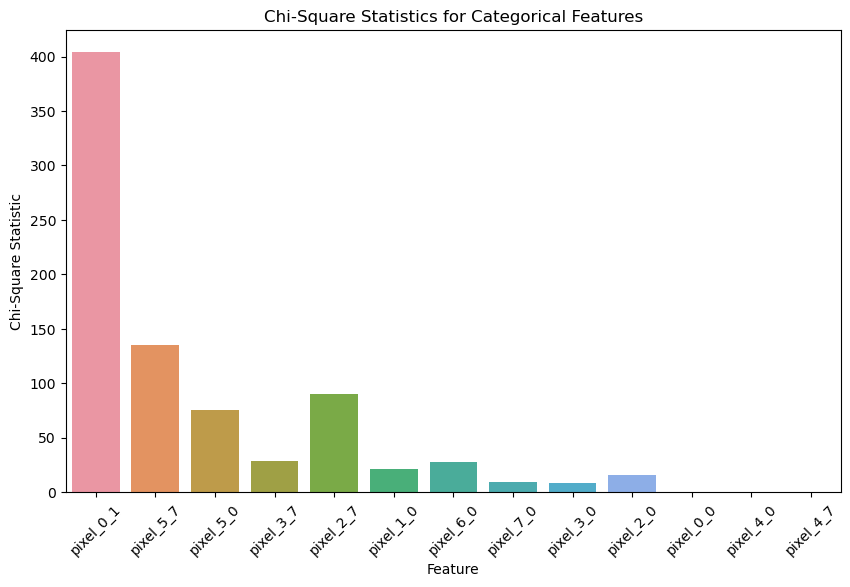

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(data=chi2_info_df, x='Feature', y='Chi2')
plt.title('Chi-Square Statistics for Categorical Features')
plt.xlabel('Feature')
plt.ylabel('Chi-Square Statistic')
plt.xticks(rotation=45)
plt.show()

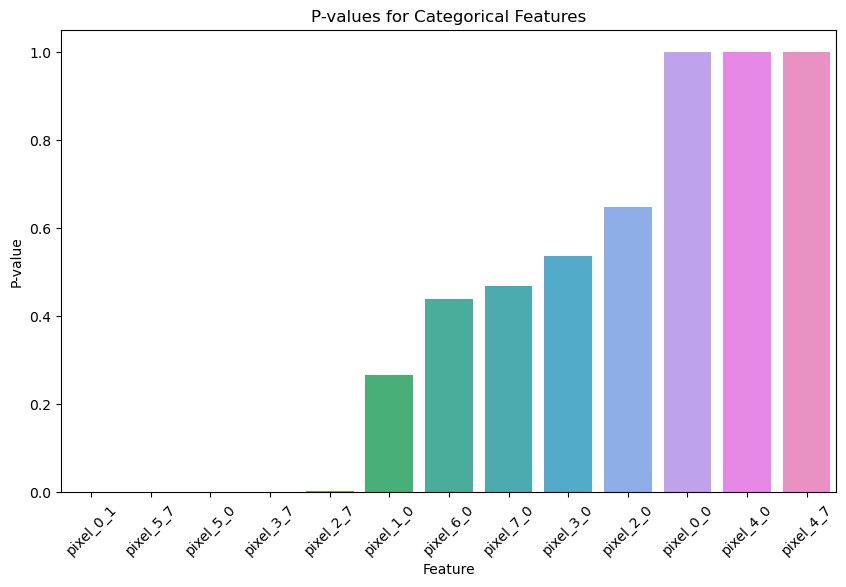

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(data=chi2_info_df, x='Feature', y='P-value')
plt.title('P-values for Categorical Features')
plt.xlabel('Feature')
plt.ylabel('P-value')
plt.xticks(rotation=45)
plt.show()

#### Chi-Square Test Assumptions

The chi-square test (used for feature selection) has the following key assumptions:

1. **Categorical Data**

   - Both the feature and the target must be **categorical** (or numeric features discretized into categories).
   - Continuous features need to be **binned/discretized** before applying chi-square.

2. **Independence of Observations**

   - Each observation (row/sample) must be **independent** of the others.
   - No repeated measurements or paired data.

3. **Expected Frequency**

   - Each cell in the contingency table should have a **sufficiently large expected frequency**.
   - Common rule of thumb: **all expected counts ≥ 5**.
   - If many cells have very small expected counts, chi-square may be inaccurate and lose statistical power.

4. **Random Sampling**
   - The data should be drawn from a **random sample** of the population.

---


When the number of samples in a contingency table is small, the **chi-square test may not be reliable** because some expected counts might be too low (typically < 5). In such cases, we can use **Fisher’s exact test**.

#### Fisher’s Exact Test

Fisher’s exact test is a **statistical test used to determine if there is a non-random association between two categorical variables**. Unlike chi-square, it does not rely on large-sample approximations and gives an **exact p-value**, making it suitable for small or sparse datasets.

**Key Points:**

**Use case:**

- Most commonly applied to **2x2 contingency tables**.
- Particularly useful when some expected frequencies are very low.

**How it works:**

- Calculates the **exact probability** of obtaining the observed table under the null hypothesis of independence.
- Produces a **p-value**, which can be compared to a significance level (e.g., α = 0.05) to decide if the variables are dependent.

**Interpretation:**

- **p-value < α:** Reject the null hypothesis → the feature is informative (dependent on the target).
- **p-value ≥ α:** Fail to reject the null hypothesis → the feature may not be informative (independent of the target).

**Comparison with Chi-Square:**

| Aspect            | Chi-Square         | Fisher’s Exact                        |
| ----------------- | ------------------ | ------------------------------------- |
| Table Size        | Any, usually large | Small, typically 2x2                  |
| Expected Counts   | ≥ 5                | No restriction                        |
| Accuracy          | Approximate        | Exact                                 |
| Feature Selection | Common             | For small/sparse categorical features |


In [11]:
from scipy.stats import fisher_exact

# Example 2x2 contingency table
table = pd.DataFrame([[8, 2],
                      [1, 5]])


oddsratio, p_value = fisher_exact(table)
print("Odds Ratio:", oddsratio)
print("P-value:", p_value)


Odds Ratio: 20.0
P-value: 0.034965034965034975


### Handling Small Counts in Large Contingency Tables

For contingency tables larger than 2×2, if some cells have small counts, we should **merge sparse categories** to increase expected counts and ensure the chi-square test remains valid.

---

#### Handling Mixed Continuous and Categorical Features for Classification

In classification tasks, we often have a **categorical target** Y and features that are **continuous, categorical, or both**.

When applying **univariate filter methods** (like mutual information or information gain), we must be careful because most statistical measures expect features and targets to be of **compatible types**.

---

#### Challenge

- **Categorical target** (discrete classes)
- **Continuous features** (numerical)
- Problem: Many univariate scoring functions, like mutual information (`mutual_info_classif`), assume either:
  - Both variables are discrete, or
  - The scoring function can handle continuous features differently

If ignored, you might get **biased or misleading scores**. **`mutual_info_classif` is designed to handle continuous features with a discrete target.**

---

##### Discretize Continuous Features

- Convert continuous features into **categorical bins**.
- This allows standard discrete-based scoring functions (e.g., mutual information) to be applied.

**Pros:**

- Compatible with discrete scoring functions
- Simple to implement

**Cons:**

- Loss of information due to binning
- Choice of bins can affect results

```python
import pandas as pd
X['age_binned'] = pd.qcut(X['age'], q=5)  # 5 quantile bins
```

_Beware — Using Continuous Features with Discrete Targets_ Some univariate scoring methods (e.g., chi-square) assume discrete features. Applying them directly to continuous features can produce **misleading or invalid results**. Use only scoring functions that are designed to handle continuous features with discrete targets (e.g., `mutual_info_classif` in scikit-learn).


---

#### DONT USE `sklearn` for `chi2`

`sklearn.feature_selection.chi2` is commonly used for univariate feature selection with categorical targets. However, it has some important limitations:

- Only works with non-negative features
- Intended mainly for discrete/count features

_If you pass continuous or negative-valued features, the chi-square score may be invalid._

SciPy’s `scipy.stats.chi2_contingency` is a general-purpose statistical test for contingency tables.

**Pros**:

Can handle any contingency table (cross-tabulation of categorical data)

More flexible and mathematically correct

**Cons**:

You need to manually create the contingency table (e.g., pd.crosstab(feature, target))

To be eligible for inclusion in a `scikit-learn Pipeline`, each step must be an object (typically a class) that implements the `fit()` and `transform()` methods.
In practice, this means defining a custom transformer as a class with fit and transform functions, which can then be composed and stacked sequentially within the Pipeline.
